In [1]:
#PCA by hand - 1) standardize the dataset, 2) construct the covariance matrix, 3) obtaining
# the eigenvalues and eigenvectors of the covariance matrix, 4) Sorting the eigenvalues by decreasing
# order to rank the eigenvectors

import pandas as pd
df_wine = pd.read_csv('wine.data', header = None)


In [2]:
#Separating training and test datasets with the 70-30 rule

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3,
                    stratify = y,
                    random_state = 0)

#Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)


In [3]:
#Obtaining the eigenpairs of the covariance matrix
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

#np.cov computes the covariance matrix and the linalg.eig performs the 
#eigendecomposition which yields a vector with the 13 eigenvalues and vectors as a 13x13 matrix


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


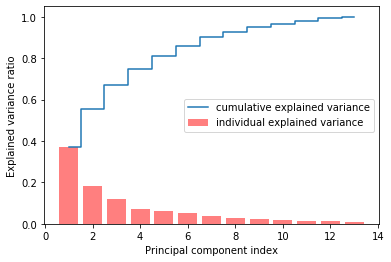

In [5]:
#Creating the variance explained ratios of the eigenvalues

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
          sorted(eigen_vals, reverse = True)]

cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha = 0.5, align = 'center',
       label = 'individual explained variance', color = 'red')
plt.step(range(1, 14), cum_var_exp, where = 'mid',
        label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.show()


In [6]:
#Sorting the eigenpairs by decreasing order of the eigenvalues
#Make a list of the (eigenvalue, eigenvector) tuples

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
                for i in range(len(eigen_vals))]

#Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key = lambda k: k[0], reverse = True)

In [9]:
# Collect the two eigenvectors that have the two largest eigenvalues (60% of variance)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)
#A 13x2-dimensional projection matrix W from the top two eigenvectors

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [10]:
#Transforming the entire 124x13-dimensional training dataset onto the two principal components
# using matrix dot product

X_train_pca = X_train_std.dot(w)

#Now as 124 x 2-dimensional matrix

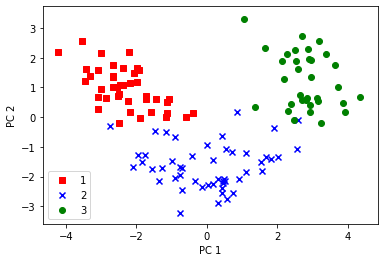

In [17]:
#Creating a scatterplot of the new matrix
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
               X_train_pca[y_train ==l, 1],
               c = c, label = l, marker = m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None,
                         resolution = 0.02):
    
    #Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #Plot the class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.6, 
                    c = cmap(idx),
                    marker = markers[idx], 
                    label = cl,
                    edgecolor = 'black')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


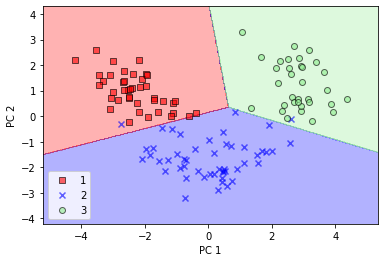

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


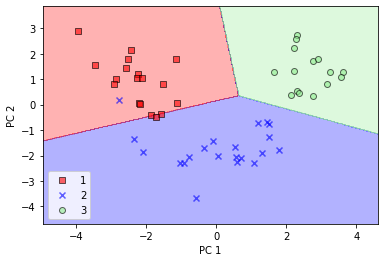

In [21]:
#plot the decision region of the logistic regression on the transformed dataset 
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

In [22]:
#We can also set the n_components to None if we want all of the different PCs
# can access the explained variance ratio via explained_variance_ratio_

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

#All the PCs in sorted order

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [23]:
#LDA by hand - Computing the scatter matrices
np.set_printoptions(precision= 4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(
        X_train_std[y_train == label], axis = 0))
    print('MV %s: %s\n' % (label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [24]:
d = 13 # Number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

print('Within-class scatter matrix: %sx%s' % (
    S_W.shape[0], S_W.shape[1]))


Within-class scatter matrix: 13x13


In [25]:
#There is the assumption that the class labels in the training dataset are uniformly distributed
#Not true

print('Class label distribution: %s'
     % np.bincount(y_train)[1:])


Class label distribution: [41 50 33]


In [26]:
#Need to scale the individual matricies since they are not uniformly distributed
#Same as the covariance matrix in the end - within-class scatter matrix

d = 13 # Number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter

print('Within-class scatter matrix: %sx%s' % (
    S_W.shape[0], S_W.shape[1]))


Within-class scatter matrix: 13x13


In [27]:
#Between-class scatter matrix
mean_overall = np.mean(X_train_std, axis = 0)
d = 13 #number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) #make column vector
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot(
                (mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (
    S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [29]:
#Instead of the eigendecomposition on the covariance matrix like in PCA, we "solve the 
# generalized eigenvalue problem of the matrix"

eigen_vals, eigen_vecs = \
    np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

#After computing the eigenpairs - can sort the eigenvalues in descending order
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[: , i])
              for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs,
                    key = lambda k: k[0], reverse = True)
print('Eigenvalues in descending order:\n')

for eigen_val in eigen_pairs:
    print(eigen_val[0])
    
#Only two nonzero eigenvalues

Eigenvalues in descending order:

349.6178089059939
172.76152218979388
3.7853134512521556e-14
2.117398448224407e-14
1.5164618894178885e-14
1.5164618894178885e-14
1.3579567140455979e-14
1.3579567140455979e-14
7.587760371654683e-15
5.906039984472233e-15
5.906039984472233e-15
2.256441978569674e-15
0.0


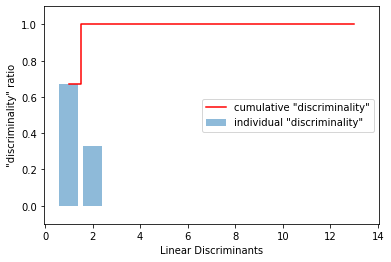

In [32]:
#Measuring how much of the class-discriminatory information is captured by the eigenvectors

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha = 0.5, align = 'center',
       label = 'individual "discriminality"')
plt.step(range(1, 14), cum_discr, where = 'mid',
        label = 'cumulative "discriminality"', color = 'r')
plt.ylabel('"discriminality" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc = 'best')
plt.show()

#First two discriminants capture 100% of the variation

In [33]:
#Stacking the two most discriminant eigenvector columns to create the transformation matrix W
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


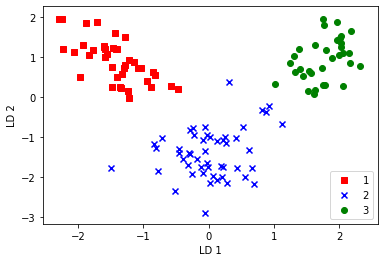

In [34]:
#Can now transform the training dataset by multiplying by the W matrix

X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
               X_train_lda[y_train == l, 1] * (-1),
               c = c, label = l, marker = m)
    
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower right')
plt.show()

#The three wine classes are now linearly separable in the new feature subspace

In [35]:
#LDA in scikit-learn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components= 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


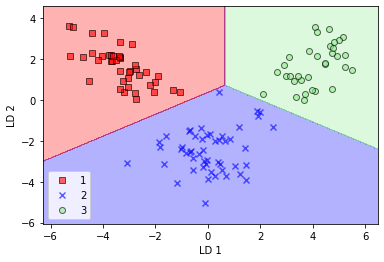

In [36]:
#Now lets see how the logistic regression classifier does
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier= lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


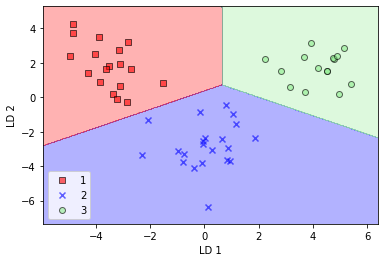

In [37]:
#Test set
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.show()

In [38]:
#Kernel PCA via via the Radial Basis Funciton (RBF)

from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
    
    n_components: int
        Number of principal components to return
    
    Returns
    -----------
        X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
            Projected dataset
    """
    #Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    
    sq_dists = pdist(X, 'sqeuclidean')
    
    #Convert pairwise distances into a square matrix
    mat_sq_dist = squareform(sq_dists)
    
    #Compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dist)
    
    #Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    #Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, i]
                           for i in range(n_components)))
    return X_pc

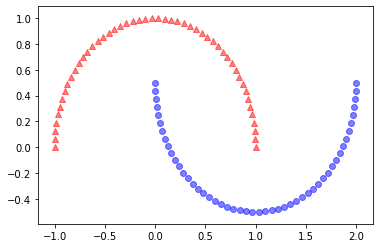

In [39]:
#Example 1 - separating half-moon shapes

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
           color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y==1, 0], X[y == 1, 1],
           color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

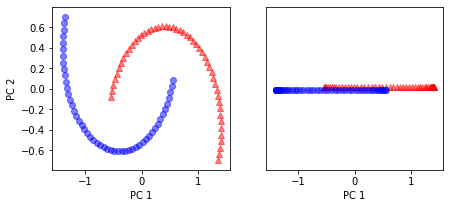

In [43]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)

X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
             color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
             color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
             color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
             color = 'blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show()

#Doesnt work to discriminate because the samples are non-linear 

/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


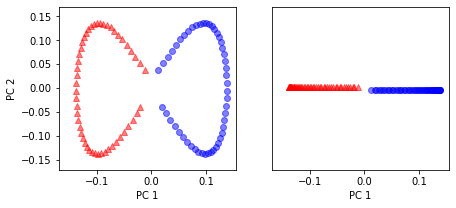

In [44]:
#Same dataset but using RBF kernel PCA

X_kpca = rbf_kernel_pca(X, gamma = 15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
             color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
             color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02,
             color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02,
             color = 'blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show()

#It is now linearly separable - can be used for training datasets for linear classifiers

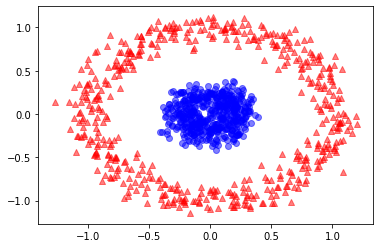

In [47]:
#Example 2 - separating concentric circles

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,
                   random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
           color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1],
           color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

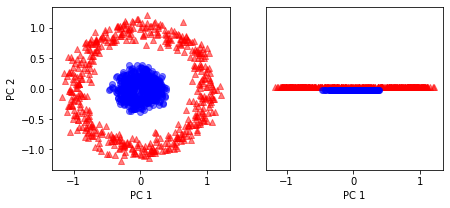

In [52]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (7,3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
             color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
             color = 'blue', marker = 'o', alpha = 0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
             color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
             color = 'blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show()

/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


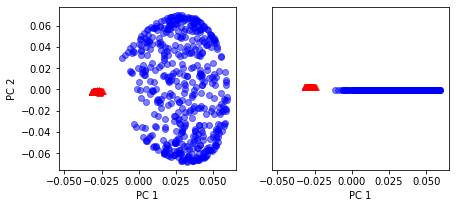

In [53]:
#Same dataset but using RBF kernel PCA

X_kpca = rbf_kernel_pca(X, gamma = 15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (7, 3))

ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
             color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
             color = 'blue', marker = 'o', alpha = 0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
             color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
             color = 'blue', marker = 'o', alpha = 0.5)

ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show()

#It is now linearly separable - can be used for training datasets for linear classifiers

In [54]:
#Kernel PCA via via the Radial Basis Funciton (RBF)
#This one is modified so it returns the eigenvalues of the kernel matrix


from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
    
    n_components: int
        Number of principal components to return
    
    Returns
    -----------
        alphas: {NumPy ndarray}, shape = [n_samples, k_features]
            Projected dataset
            
        lambdas: list
            Eigenvalues
    """
    #Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    
    sq_dists = pdist(X, 'sqeuclidean')
    
    #Convert pairwise distances into a square matrix
    mat_sq_dist = squareform(sq_dists)
    
    #Compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dist)
    
    #Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    #Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, i]
                           for i in range(n_components)))
    
    #Collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]
    
    
    return alphas, lambdas

In [55]:
#New half-moon dataset
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma = 15, n_components=1)


/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:55: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [56]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [57]:
x_proj = alphas[25] #original projection
x_proj

array([0.0788])

In [58]:
def project_x(n_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum(
                            (x_new - row) ** 2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [59]:
x_reproj = project_x(x_new, X, 
                    gamma = 15, alphas=alphas, lambdas=lambdas)
x_reproj

array([0.0788])

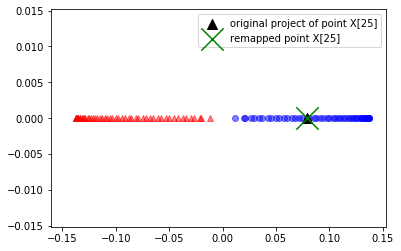

In [60]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
           color = 'red', marker = '^', alpha = 0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
           color = 'blue', marker = 'o', alpha = 0.5)
plt.scatter(x_proj, 0, color = 'black',
           label = 'original project of point X[25]',
           marker = '^', s = 100)
plt.scatter(x_reproj, 0, color = 'green',
           label = 'remapped point X[25]',
           marker = 'x', s = 500)
plt.legend(scatterpoints = 1)
plt.show()

In [61]:
#Kernel in scikit-learn
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, 
                       kernel='rbf', gamma = 15)
X_skernpca = scikit_kpca.fit_transform(X)

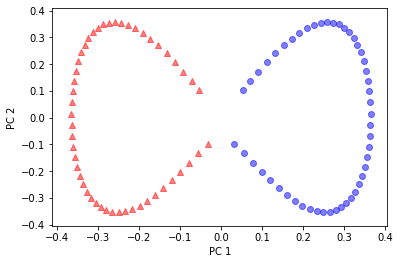

In [62]:
plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
           color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
           color = 'blue', marker = 'o', alpha = 0.5)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()